In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split #Function to split dataset into training set and test set
from sklearn import metrics #Metric module for accuracy calculations


#LIBRATRIES FOR VISUALIZATION
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [2]:
#Import the csv file

columns = ["pregnancies", "glucose", "bp", 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima_dataset = pd.read_csv("diabetes.csv", header=None, names=columns)

#eliminate the first row
pima_dataset = pima_dataset.iloc[1:]

pima_dataset.head()


,pregnancies,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#divide columns into features and target variable
#y = target
#x = features
y = pima_dataset.label
x = pima_dataset[[col for col in pima_dataset.columns if col != 'label']]

#replace NaN values with 0
x = x.fillna(0)

non_numeric_values = x.pregnancies[~x.pregnancies.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'pregnancies':", non_numeric_values)

#search for non numeric values in the glucose column
non_numeric_values = x.glucose[~x.glucose.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'glucose':", non_numeric_values)

#search for non numeric values in the bp column
non_numeric_values = x.bp[~x.bp.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'bp':", non_numeric_values)

#search for non numeric values in the skin column
non_numeric_values = x.skin[~x.skin.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'skin':", non_numeric_values)

#search for non numeric values in the insulin column
non_numeric_values = x.insulin[~x.insulin.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'insulin':", non_numeric_values)

#search for non numeric values in the bmi column
non_numeric_values = x.bmi[~x.bmi.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'bmi':", non_numeric_values)

#search for non numeric values in the pedigree column
non_numeric_values = x.pedigree[~x.pedigree.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'pedigree':", non_numeric_values)

#search for non numeric values in the age column
non_numeric_values = x.age[~x.age.apply(lambda val: str(val).replace('.', '', 1).isdigit())]
print("Valori non numerici in 'age':", non_numeric_values)



Valori non numerici in 'pregnancies': Series([], Name: pregnancies, dtype: object)
Valori non numerici in 'glucose': Series([], Name: glucose, dtype: object)
Valori non numerici in 'bp': Series([], Name: bp, dtype: object)
Valori non numerici in 'skin': Series([], Name: skin, dtype: object)
Valori non numerici in 'insulin': Series([], Name: insulin, dtype: object)
Valori non numerici in 'bmi': Series([], Name: bmi, dtype: object)
Valori non numerici in 'pedigree': Series([], Name: pedigree, dtype: object)
Valori non numerici in 'age': Series([], Name: age, dtype: object)


In [4]:
#divide the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

## DECISION TREE USING GINI CRITERION

In [5]:
#Build Decision TRee Classifier
dt_clf = DecisionTreeClassifier() #default criterion: GINI INDEX
dt_clf = dt_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = dt_clf.predict(X_test)

print("PREDICTIONS:", y_pred)

PREDICTIONS: ['0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '0' '0' '1'
 '0' '0' '1' '0' '1' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1' '0'
 '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0'
 '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '1' '1' '1'
 '0' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0'
 '0' '0' '1' '0' '1' '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '1' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '1' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '0' '0'
 '1' '1' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0'
 '0' '1' '1' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1'
 '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0']


In [6]:
#Evaluate the Model

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.683982683982684


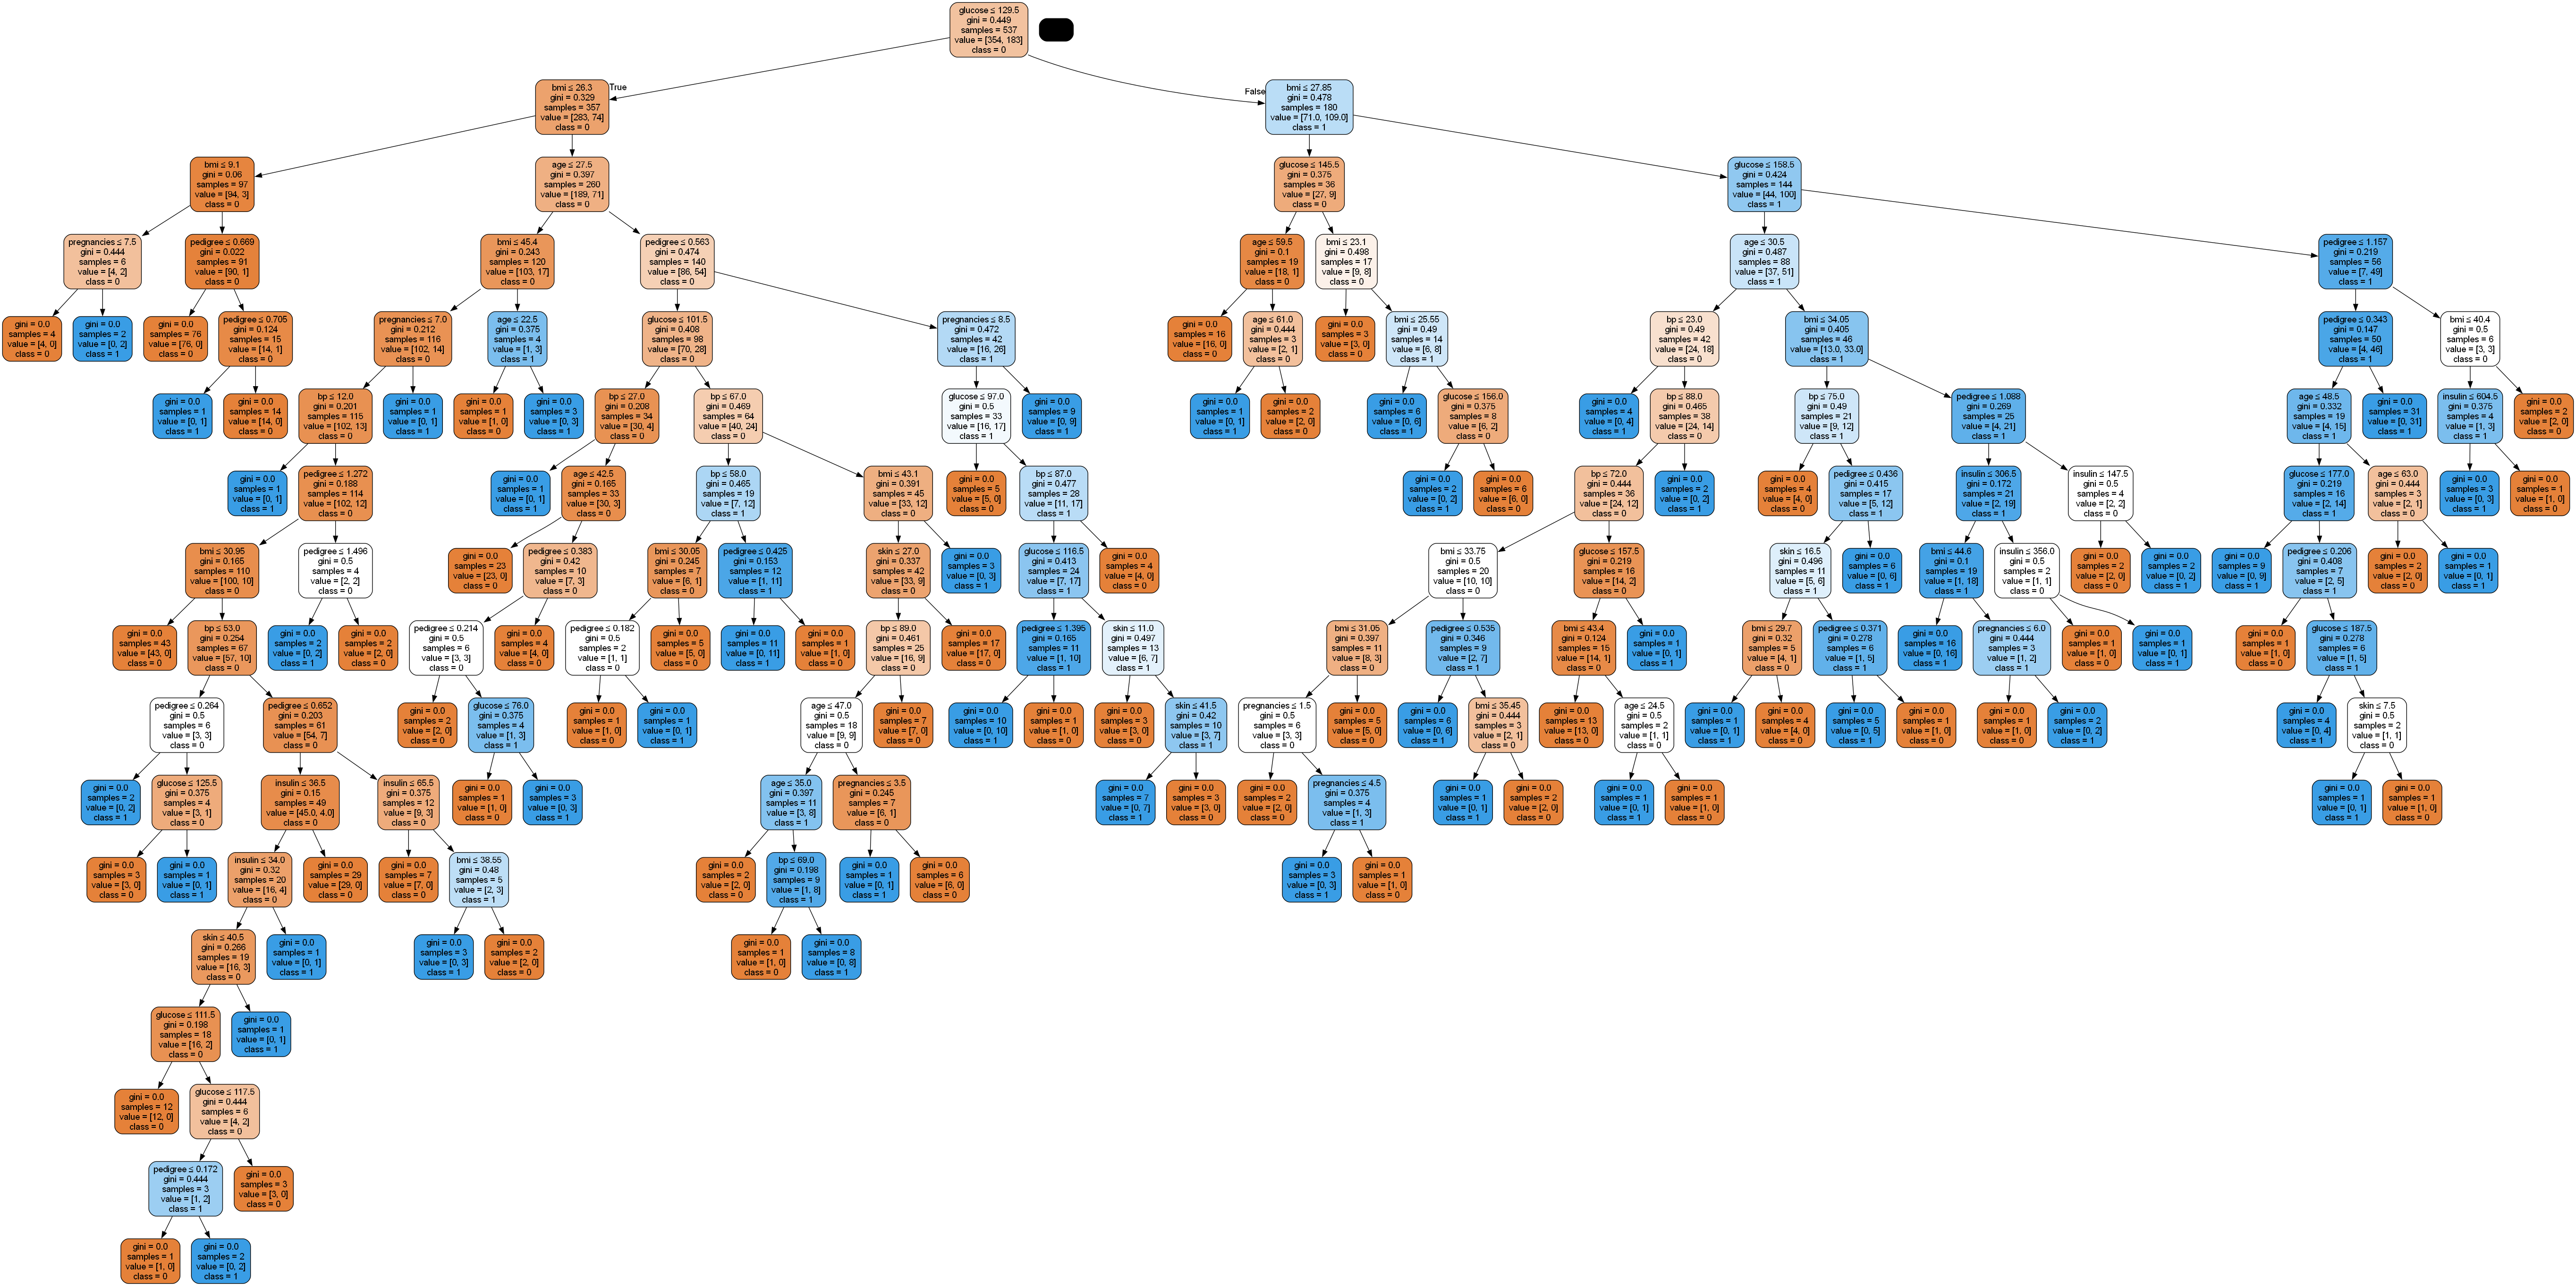

In [7]:
#Plot the full Decision Tree

dot_data = StringIO() #create a StringIO object
export_graphviz(dt_clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = columns[:-1], class_names=['0', '1']) #export the decision tree to the StringIO object

#Create a graph from the StringIO object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Show the graph
graph.write_png('decTree_gini_default_behavior.png')
Image(graph.create_png())

## DECISION TREE USING ENTROPY

In [8]:
# Build the Decision Tree with Entropy criterion
dt_clf_entropy = DecisionTreeClassifier(criterion="entropy")

# Train the model
dt_clf_entropy = dt_clf_entropy.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_entropy = dt_clf_entropy.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_entropy))

Accuracy: 0.7445887445887446


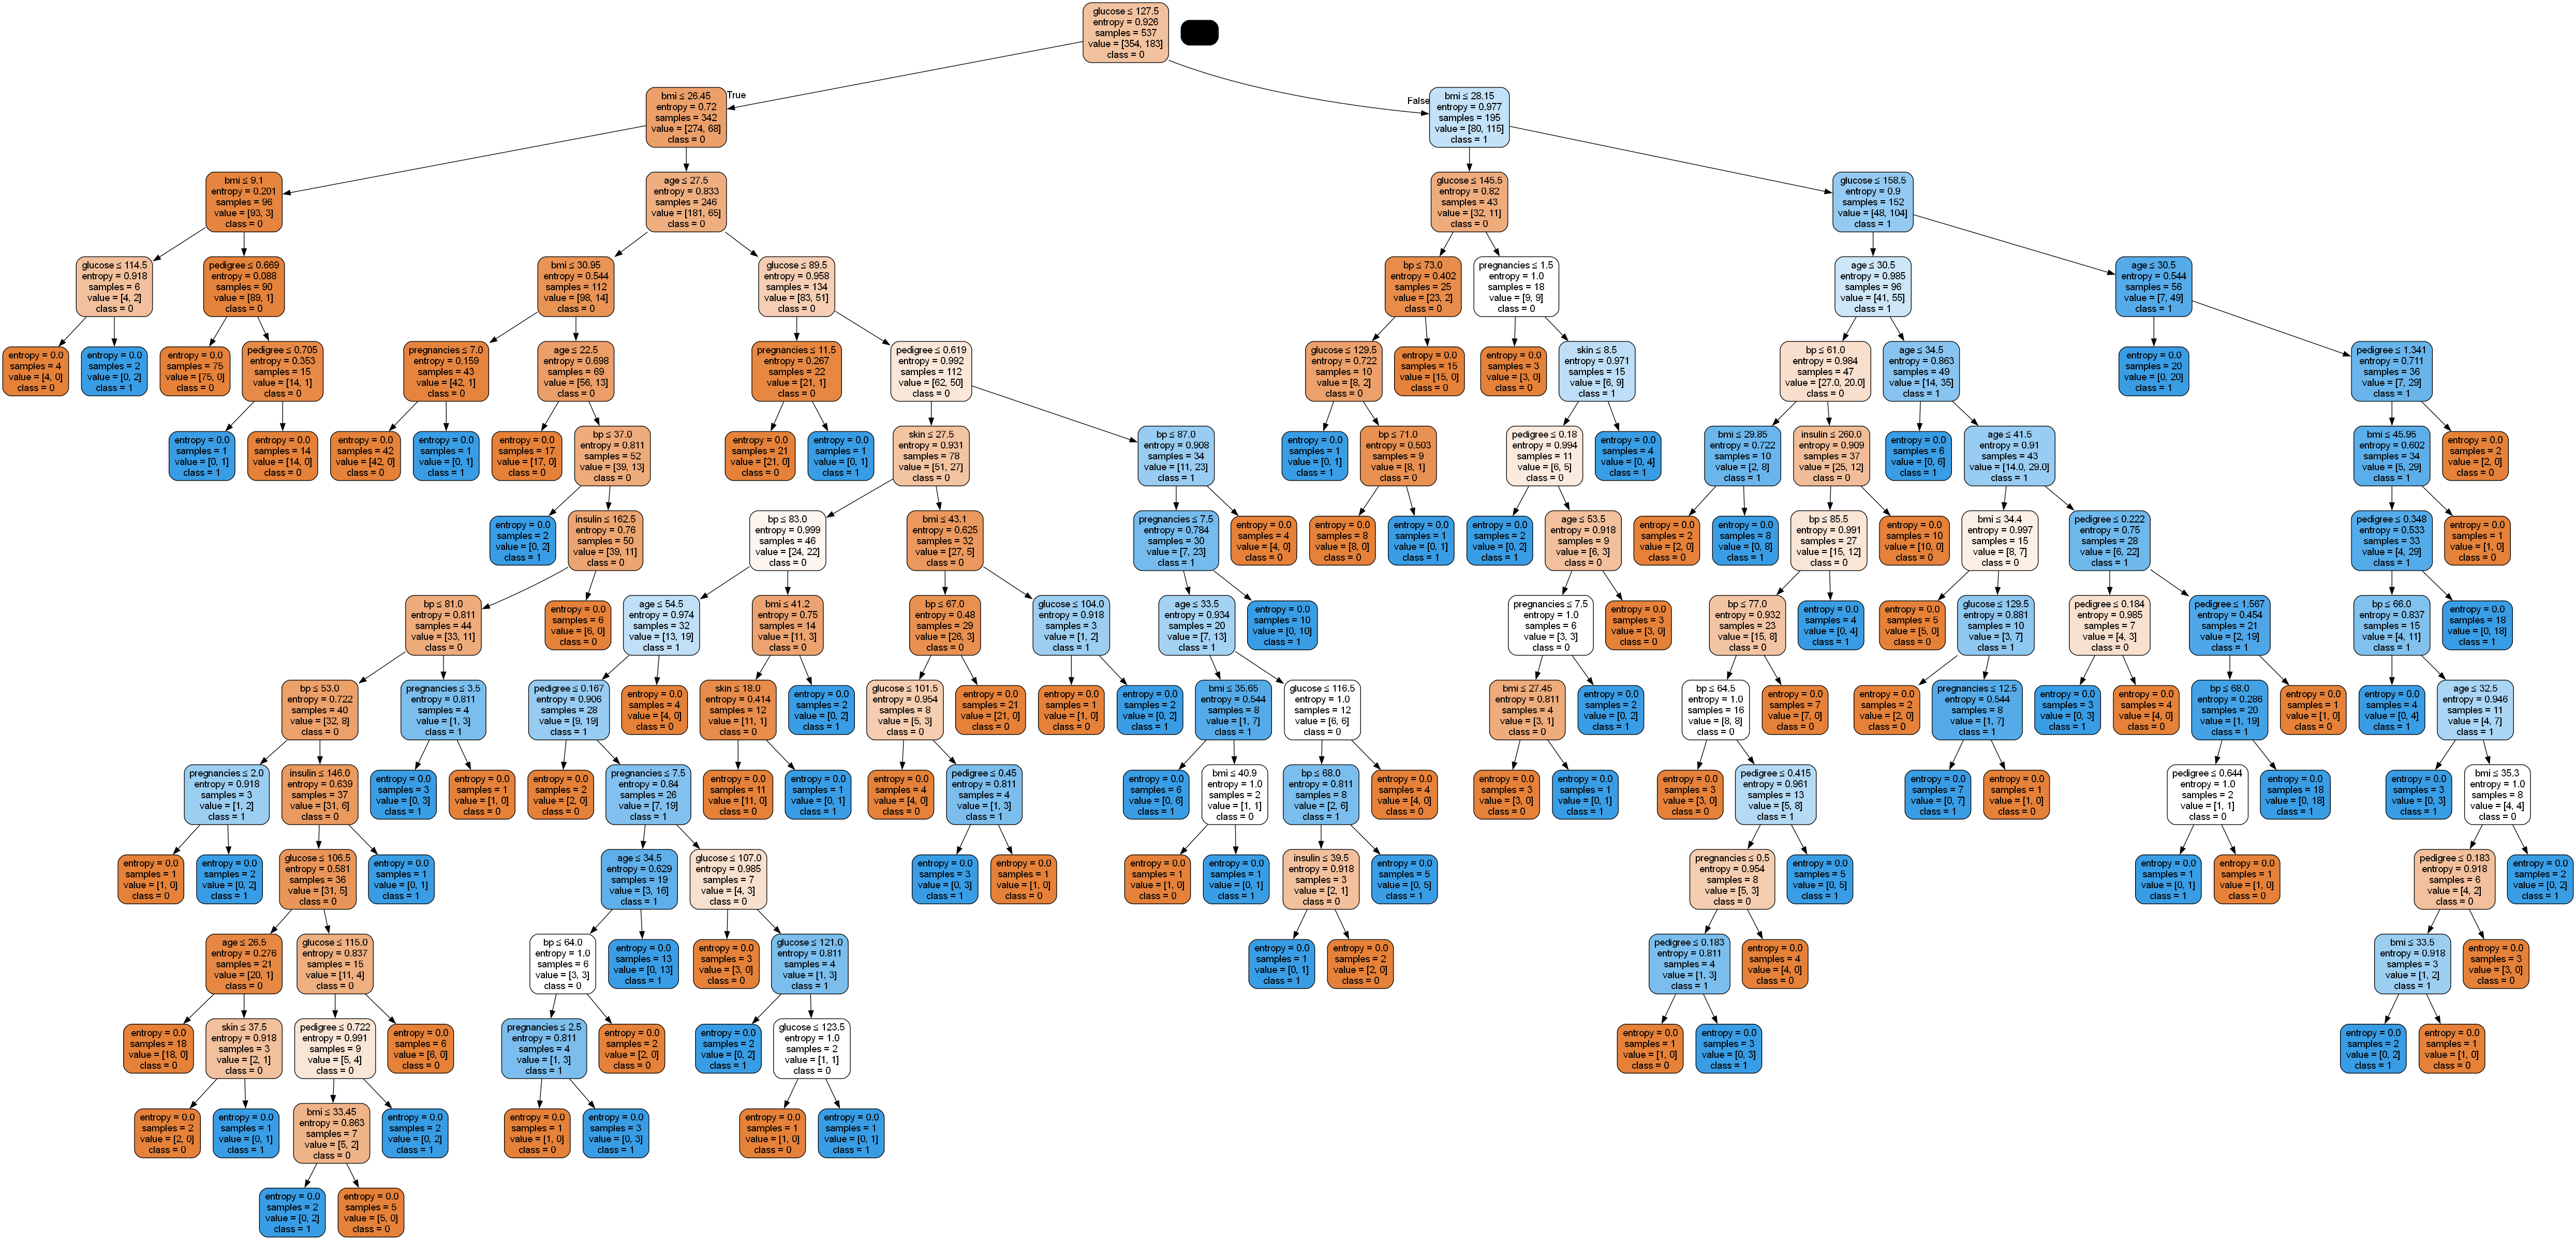

In [9]:
# Plot the full Entrpy Decision Tree
dot_data = StringIO() #create a StringIO object
export_graphviz(dt_clf_entropy, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = columns[:-1], class_names=['0', '1']) #export the decision tree to the StringIO object

#Create a graph from the StringIO object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Show the graph
graph.write_png('decTree_entropy_default_behavior.png')
Image(graph.create_png())

## IMPURE SHORTER DEC TREE FOR BETTER VISUALIZZATION
However, the leaf nodes are impure!

In [10]:
# Build the Decision Tree with Entropy criterion and max_depth = 4
dt_clf_entropy_depth4 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train the model
dt_clf_entropy_depth4 = dt_clf_entropy_depth4.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_entropy_depth4 = dt_clf_entropy_depth4.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_entropy_depth4))

Accuracy: 0.7878787878787878


Since the accuracy that measures the performance of the model when working the on the test subset is higher, it's a good trade-off between impurity and avoiding overfitting.

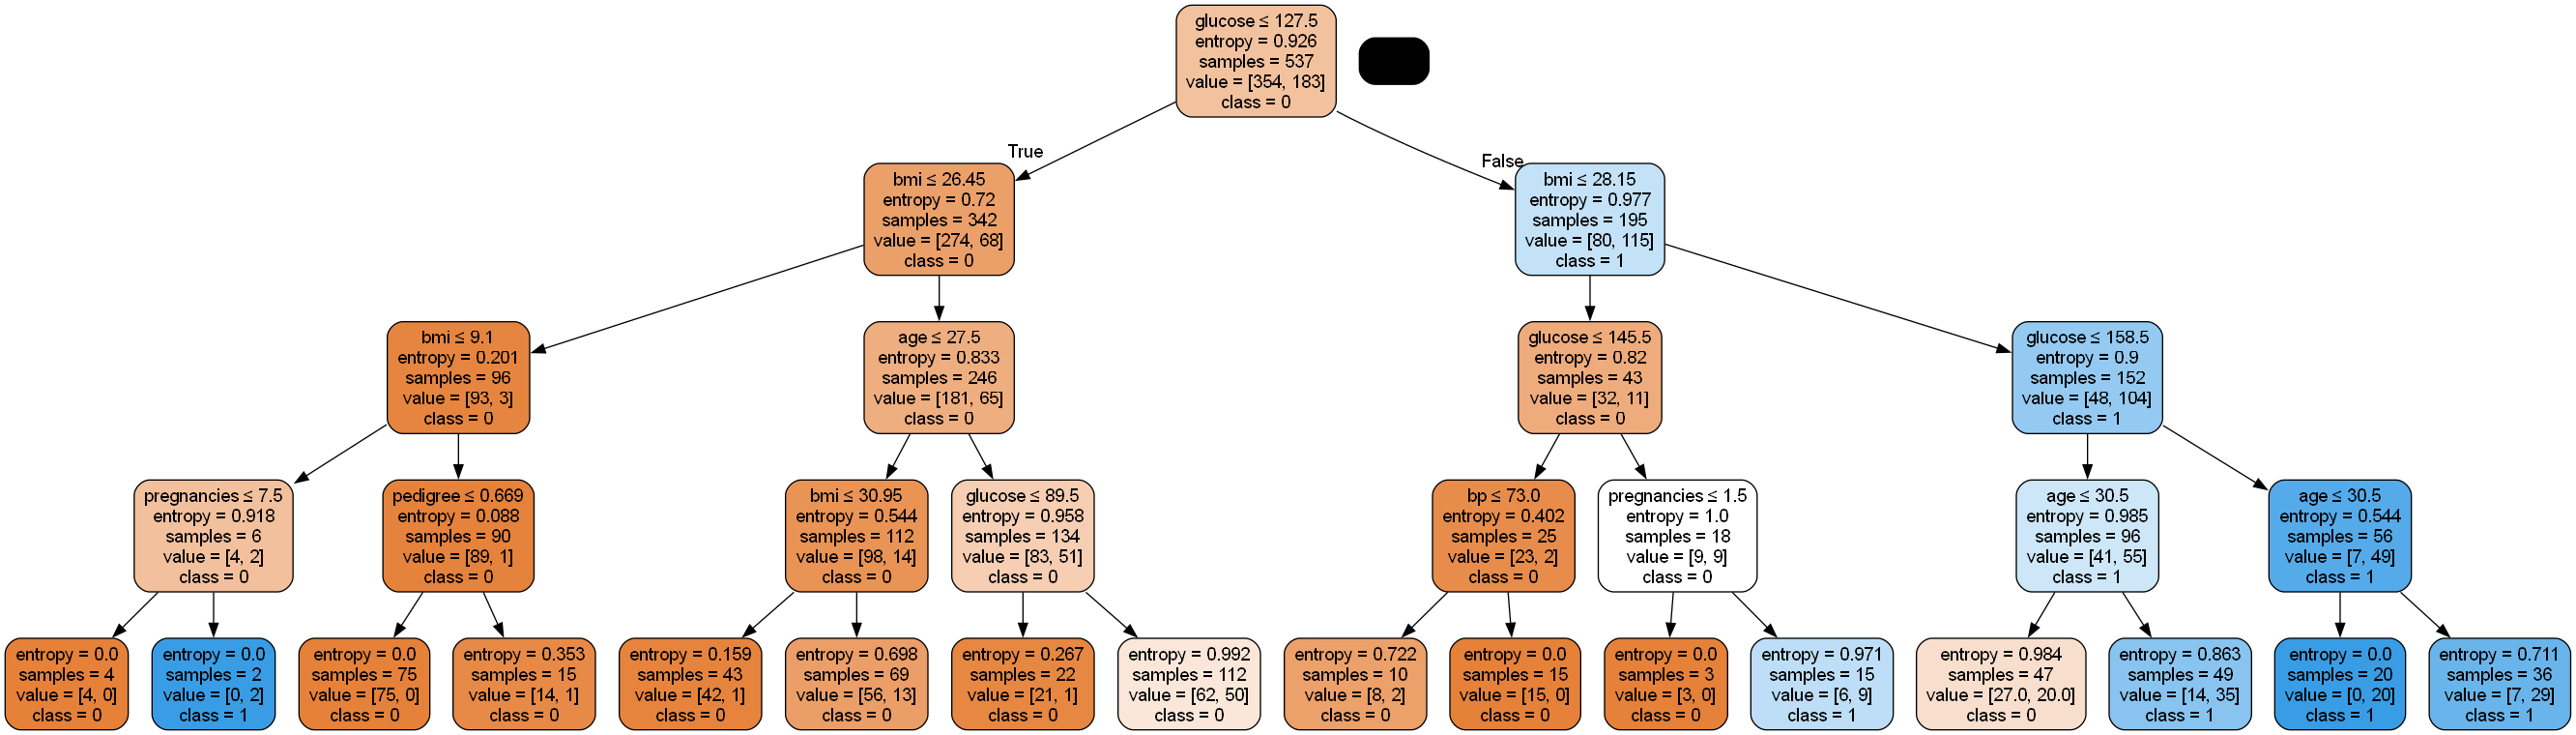

In [11]:
# Plot the full Entrpy Decision Tree
dot_data = StringIO() #create a StringIO object
export_graphviz(dt_clf_entropy_depth4, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = columns[:-1], class_names=['0', '1']) #export the decision tree to the StringIO object

#Create a graph from the StringIO object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Show the graph
graph.write_png('decTree_entropy_max_depth_4.png')
Image(graph.create_png())

In [12]:
#ANALYSIS OF THE MAX DEPTH 4 TREE

import numpy as np

#IMPURE NODES WITH ENTROPY > 0
impure_nodes = np.array(dt_clf_entropy_depth4.tree_.impurity > 0)
print("Impure Nodes:", impure_nodes)

print("Number of Impure Nodes:", np.sum(impure_nodes))

#LEAF NODES
leaves = np.array([dt_clf_entropy_depth4.tree_.children_left[i] == -1 and dt_clf_entropy_depth4.tree_.children_right[i] == -1 for i in range(dt_clf_entropy_depth4.tree_.node_count)])

print("Leaf Nodes:", leaves)
total_leaves = np.sum(leaves)
print("Number of Leaf Nodes:", total_leaves)

Impure Nodes: [ True  True  True  True False False  True False  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True False  True]
Number of Impure Nodes: 25
Leaf Nodes: [False False False False  True  True False  True  True False False  True
  True False  True  True False False False  True  True False  True  True
 False False  True  True False  True  True]
Number of Leaf Nodes: 16


class == False --> class 0
class == True --> class 1

In [13]:
# Count leaves with entropy > 0
leaves_entropy = np.array([dt_clf_entropy_depth4.tree_.impurity[i] > 0 #has entropy > 0
                           and dt_clf_entropy_depth4.tree_.children_left[i] == -1 and dt_clf_entropy_depth4.tree_.children_right[i] == -1 #is a leaf
                           for i in range(dt_clf_entropy_depth4.tree_.node_count)])

print("Leaf Nodes with Entropy > 0:", leaves_entropy)
impure_leaves = np.sum(leaves_entropy)
print("Number of Leaf Nodes with Entropy > 0:", impure_leaves)


Leaf Nodes with Entropy > 0: [False False False False False False False False  True False False  True
  True False  True  True False False False  True False False False  True
 False False  True  True False False  True]
Number of Leaf Nodes with Entropy > 0: 10


In [14]:
#Ratio between impure leaves and total leaves
print("Ratio between Impure Leaves and Total Leaves:", impure_leaves/total_leaves)

Ratio between Impure Leaves and Total Leaves: 0.625
